# __THE SPARKS FOUNDATION__
***

## _TASK 4_
## _EXPLORATORY DATA ANALYSIS oN GLOBAL TERRORISM DATASET_ 

In [23]:
#importing the neccessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 

In [24]:
#reading the dataset

df = pd.read_csv('Global Terrorism - START data\globalterrorismdb_0718dist.csv', encoding='latin=1')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df=df[['Year','Month','Day','Country','Region','City','extended','latitude','longitude','AttackType','Killed','Wounded','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,extended,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,0,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,0,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,0,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,0,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [26]:
df.isnull().sum() #checking missing values

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
extended           0
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [27]:
df.shape # size of table: 181691 rows and 15 coloumns

(181691, 16)

In [28]:
df.describe(include='all')

,Year,Month,Day,Country,Region,City,extended,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
count,181691.000000,181691.000000,181691.000000,181691,181691,181257,181691.000000,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,181691,181691,181691
unique,NaN,NaN,NaN,205,12,36674,NaN,NaN,NaN,9,NaN,NaN,86006,3537,22,12
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,Unknown,Private Citizens & Property,Explosives
freq,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,NaN,88255,NaN,NaN,6461,82782,43511,92426
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,0.045346,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,0.208063,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,0.000000,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,0.000000,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,0.000000,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN


In [29]:
print('The number of countries: ',df.Country.nunique())
print('The regions attacked: ', df.Region.nunique())
print('The data collected is from', df.Year.min(),'-',df.Year.max())


The number of countries:  205
The regions attacked:  12
The data collected is from 1970 - 2017


In [30]:
from ipywidgets import interact, interact_manual

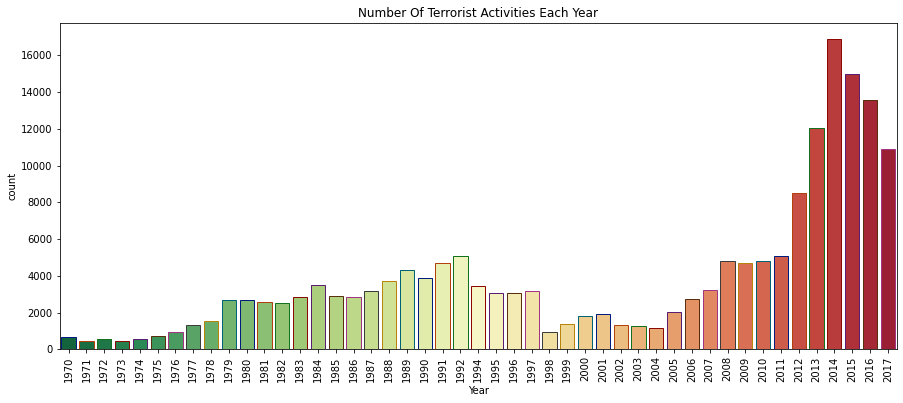

In [10]:
# Terrorist attact over the years
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

### _In the year 2014 there was the highest number of terror attack._ 

In [42]:
# Regions affected by terrorism in each year
@interact

def attack_year(year=list(df['Year'].unique())):
    a = df[df['Year']==year]
    return sns.countplot(y=a['Region'], palette='viridis')

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

### _Since 2014 was the year of maximum number of attacks occured, by using the above chart we can see that in the Middle East and North Africa region was the highest and was attacked about 7000 times._

In [32]:
# Checking which countries were effected more in the each region
@interact
def country_effected(region=list(df['Region'].unique())):
    a = df[df['Region']==region]
    a = pd.DataFrame(a['Country'].value_counts())
    return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

In [33]:
# Checking which cities were attacked for each country.
@interact 
def city_attacked(country=list(df['Country'].unique())):
    a = df[df['Country']==country]
    a = pd.DataFrame(a['City'].value_counts().head(10))
    return a.style.background_gradient(cmap='cool')

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

In [34]:
# Checking what kind of weapons used for the attacks in each country
@interact
def weapons_used(country=list(df['Country'].unique())):
    a = df[df['Country']==country]
    a = pd.DataFrame(a['Weapon_type'].value_counts())
    return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

Text(0.5, 1.0, 'Terror attacks on various regions from 1970 to 2017')

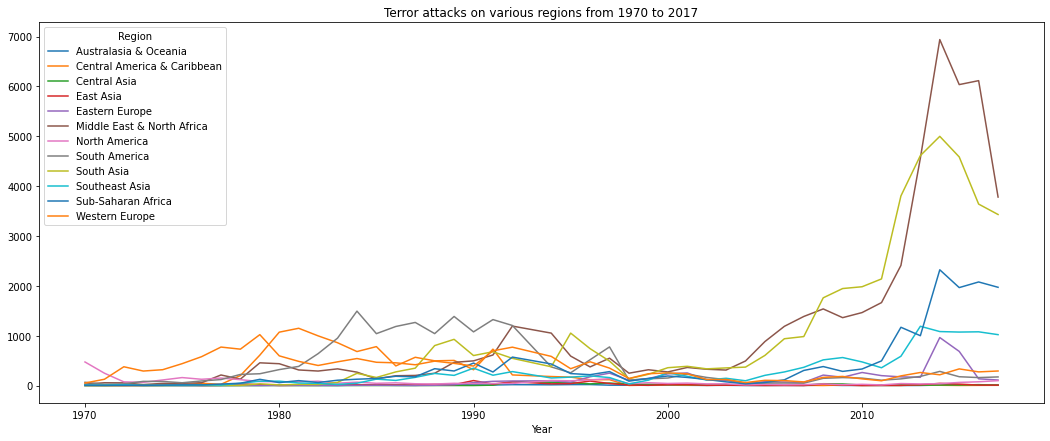

In [41]:
# Terror attacks on various regions from 1970 to 2017
plt.rcParams['figure.figsize']=(18,7)
terror_atck = pd.crosstab(df.Year, df.Region)
terror_atck.plot()
plt.title('Terror attacks on various regions from 1970 to 2017')

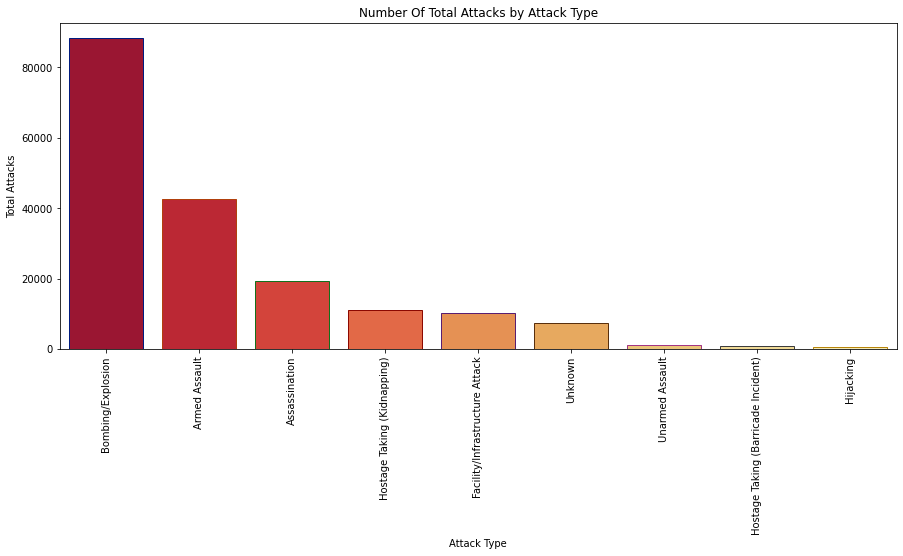

In [35]:
attack_type = df.AttackType.value_counts().to_frame().reset_index()
attack_type.columns = ['Attack Type', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_type['Attack Type'], y=attack_type['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks by Attack Type')
plt.show()

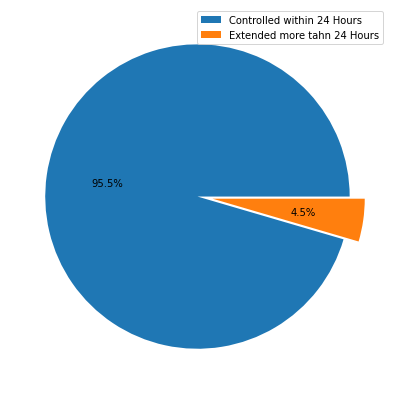

In [40]:
# The percentage of attacks which were controlled within 24 hours
plt.rcParams['figure.figsize']=(7,7)
explode = (0,0.1)
labels = ['Controlled within 24 Hours', 'Extended more tahn 24 Hours']
plt.pie(df['extended'].value_counts(), explode=explode, autopct='%1.1f%%')
plt.legend(labels, fontsize=10)
plt.show()

In [36]:
# Let's take a look at the total numbers of attacks by terrorist group:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
group_attacks

,Terrorist Group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


### _The three highest number of attacks were done by Taliban, ISIL and Shining Path, Communist party in Peru._

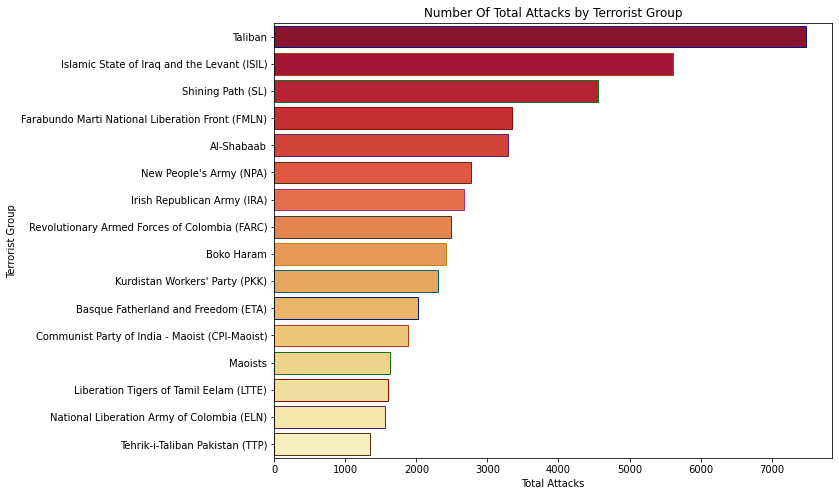

In [37]:
group_attacks = df.Group.value_counts().to_frame().drop('Unknown').reset_index()[:16]
group_attacks.columns = ['Terrorist Group', 'Total Attacks']
plt.subplots(figsize=(10,8))
sns.barplot(y=group_attacks['Terrorist Group'], x=group_attacks['Total Attacks'], palette='YlOrRd_r',
            edgecolor=sns.color_palette('dark', 10))
# plt.xticks()
plt.title('Number Of Total Attacks by Terrorist Group')
plt.show()

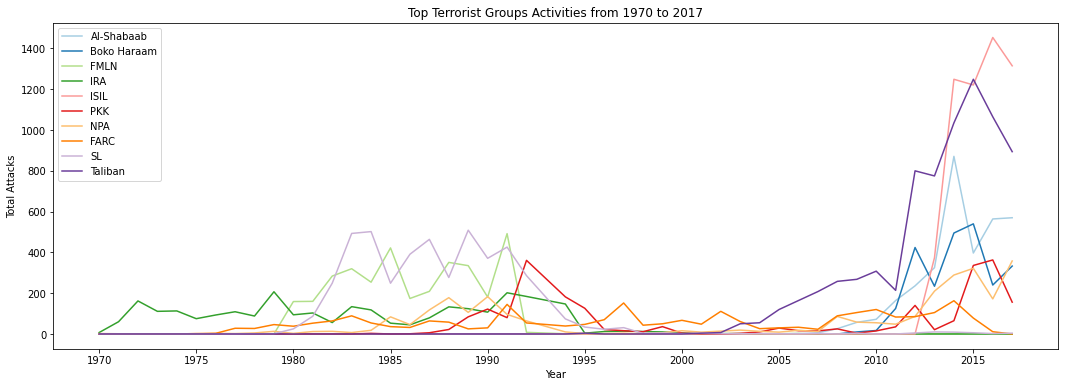

In [17]:
# Terrorist Groups Activity Trend
groups_10 = df[df.Group.isin(df.Group.value_counts()[1:11].index)]
pd.crosstab(groups_10.Year, groups_10.Group).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2017, 5))
plt.ylabel('Total Attacks')
plt.title('Top Terrorist Groups Activities from 1970 to 2017')
plt.legend(labels=['Al-Shabaab',
                   'Boko Haraam',
                   'FMLN',
                   'IRA',
                   'ISIL',
                   'PKK',
                   'NPA',
                   'FARC',
                   'SL',
                   'Taliban'], loc='upper left')
plt.show()

***

## ___TASK 4 COMPLETED___
# _THANK YOU_